In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Load the Customers Data

In [16]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transaction = pd.read_csv('Transactions.csv')

In [18]:
customers.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [20]:
products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [22]:
transaction.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


## 2. Inspect the Dataset

In [33]:
print(customers.shape)
print(customers.columns)

(200, 4)
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [35]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [37]:
customers.describe() # For numerical columns

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [41]:
# Check for Missing 
customers.isnull().sum()


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [43]:
customers[customers.duplicated()] # No duplicated rows found

,CustomerID,CustomerName,Region,SignupDate


In [45]:
#Sort or Filter by Dates
recent_signups = customers[customers['SignupDate'] >'2024-03-07']
recent_signups

,CustomerID,CustomerName,Region,SignupDate
11,C0012,Kevin May,South America,2024-08-07
12,C0013,Lauren Buchanan,South America,2024-05-19
13,C0014,Deborah Wilcox,Europe,2024-06-22
17,C0018,Tyler Haynes,North America,2024-09-21
19,C0020,Mr. Manuel Conway,North America,2024-06-11
25,C0026,Sara Miller,North America,2024-05-03
27,C0028,Jennifer Pena,Asia,2024-06-29
30,C0031,Tina Miller,South America,2024-04-11
31,C0032,Dustin Campbell,South America,2024-04-17
32,C0033,Tyler Holt,North America,2024-08-04


In [74]:
# Region wise customers
customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

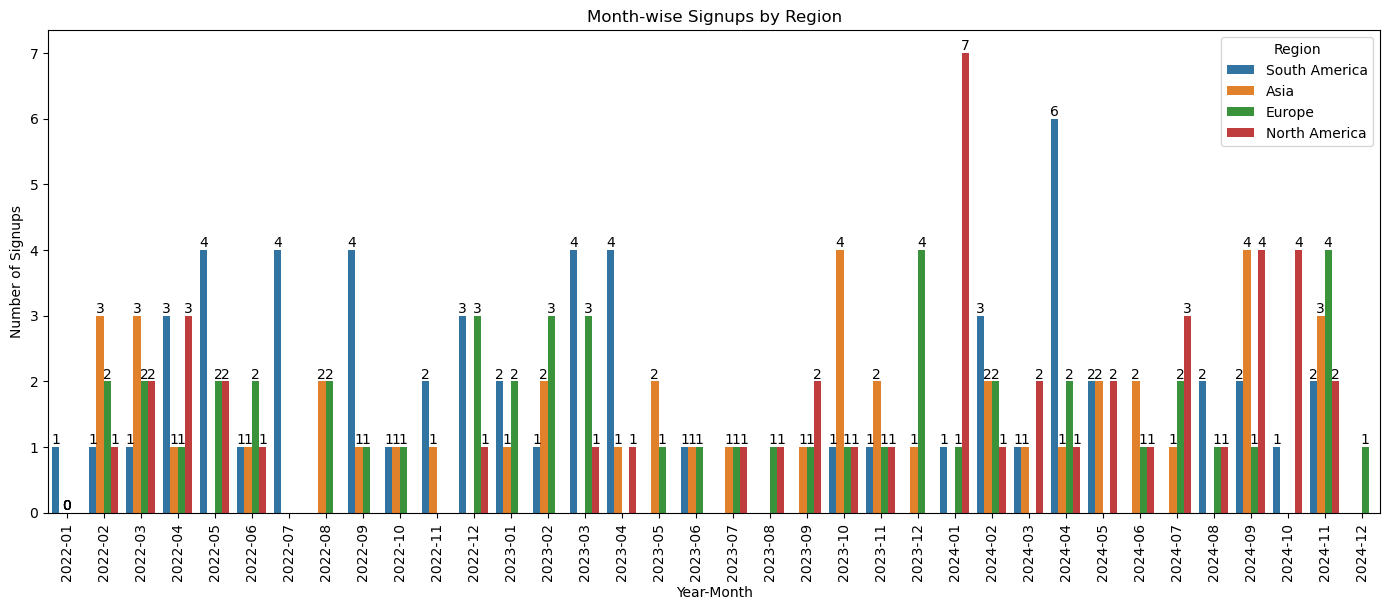

In [76]:
# Regionn wise customer signups per month
customers['SignupDate'] = pd.to_datetime(customers['SignupDate']) # Set datetime format for signup date
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M') 

# Count the number of signups per Year-Month and Region
monthly_region_signups = customers.groupby(['YearMonth', 'Region']).size().reset_index(name='Signups')

# Plot the barplot with hue for Region
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='YearMonth', y='Signups', hue='Region', data=monthly_region_signups)

# Adding data labels on top
for p in ax.patches:
    height = round(p.get_height())  
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels 
plt.xticks(rotation=90)  
plt.tight_layout()  

plt.title('Month-wise Signups by Region')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.show()

## Products Dataset Insights

In [48]:
print(products.shape)
print(products.columns)

(100, 4)
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


In [50]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [52]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [54]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [56]:
products[products.duplicated()]

,ProductID,ProductName,Category,Price


In [58]:
products.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

## Transaction Dataset Insights

In [61]:
print(transaction.shape)
print(transaction.columns)

(1000, 7)
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [63]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [65]:
transaction.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [67]:
transaction.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [69]:
transaction[transaction.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [71]:
transaction.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

#  Merging DataFrames

In [78]:
 # Perform an outer join between Transactions and Customers on CustomerID
merged_data_outer_1 = pd.merge(transaction, customers, on='CustomerID', how='outer', indicator=True)

In [80]:
# Perform an outer join between the above result and Products on ProductID
merged_data_outer = pd.merge(merged_data_outer_1, products, on='ProductID', how='outer')
merged_data_outer.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,YearMonth,_merge,ProductName,Category,Price_y
0,T00758,C0017,P001,2024-05-28 14:47:15,3.0,507.9,169.3,Jennifer King,Europe,2023-12-05,2023-12,both,ActiveWear Biography,Books,169.3
1,T00088,C0019,P001,2024-01-30 17:23:03,2.0,338.6,169.3,Brandon Rodriguez,Europe,2023-01-12,2023-01,both,ActiveWear Biography,Books,169.3
2,T00314,C0024,P001,2024-09-24 17:15:16,4.0,677.2,169.3,Michele Cooley,North America,2024-02-05,2024-02,both,ActiveWear Biography,Books,169.3


##  EDA on merged Data set

In [83]:
merged_data_outer._merge.value_counts()

_merge
both          1000
right_only       1
left_only        0
Name: count, dtype: int64

In [85]:
merged_data_outer[merged_data_outer.duplicated() ] # no duplicate values

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,YearMonth,_merge,ProductName,Category,Price_y


In [87]:
merged_data_outer.isnull().sum()

TransactionID      1
CustomerID         0
ProductID          1
TransactionDate    1
Quantity           1
TotalValue         1
Price_x            1
CustomerName       0
Region             0
SignupDate         0
YearMonth          0
_merge             0
ProductName        1
Category           1
Price_y            1
dtype: int64

In [91]:
# Drop rows with NaN
merged_data_outer = merged_data_outer.dropna()

In [93]:
merged_data_outer.describe()

,Quantity,TotalValue,Price_x,SignupDate,Price_y
count,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,1.117981,493.144478,140.73639,NaN,140.73639


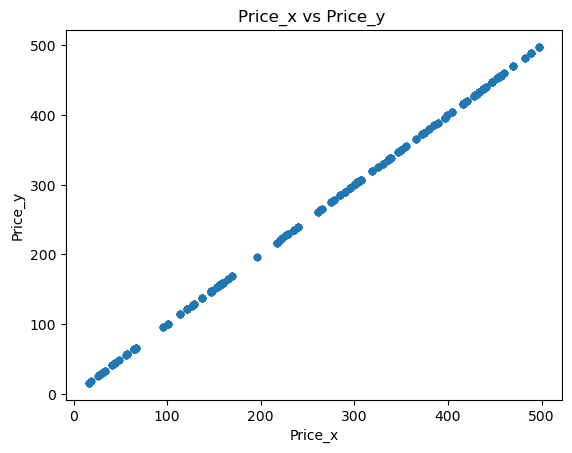

In [95]:
merged_data_outer.plot.scatter(x='Price_x', y='Price_y')
plt.title('Price_x vs Price_y ')
plt.show()
# Both Price_x and Price_y are same 

In [97]:
merged_data_outer.drop(columns=['Price_y'], inplace=True)  #dropping Price_y as it is repeating

In [99]:
# Rename column
df_renamed = merged_data_outer.rename(columns={'Price_x': 'Price'})
df_renamed.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,YearMonth,_merge,ProductName,Category
0,T00758,C0017,P001,2024-05-28 14:47:15,3.0,507.9,169.3,Jennifer King,Europe,2023-12-05,2023-12,both,ActiveWear Biography,Books
1,T00088,C0019,P001,2024-01-30 17:23:03,2.0,338.6,169.3,Brandon Rodriguez,Europe,2023-01-12,2023-01,both,ActiveWear Biography,Books
2,T00314,C0024,P001,2024-09-24 17:15:16,4.0,677.2,169.3,Michele Cooley,North America,2024-02-05,2024-02,both,ActiveWear Biography,Books


In [101]:
df_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   object        
 4   Quantity         1000 non-null   float64       
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  YearMonth        1000 non-null   period[M]     
 11  _merge           1000 non-null   category      
 12  ProductName      1000 non-null   object        
 13  Category         1000 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(3),

In [103]:
# Convert TransactionDate to datetime
df_renamed['TransactionDate'] = pd.to_datetime(df_renamed['TransactionDate'])

In [105]:
# Extract Date and Time Features
df_renamed['TransactionYear'] = df_renamed['TransactionDate'].dt.year
df_renamed['TransactionMonth'] = df_renamed['TransactionDate'].dt.month_name()
df_renamed['TransactionDay'] = df_renamed['TransactionDate'].dt.day
df_renamed['TransactionWeekday'] = df_renamed['TransactionDate'].dt.day_name()
df_renamed['TransactionHour'] = df_renamed['TransactionDate'].dt.hour

In [107]:
# Define Part of Day
def get_part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
df_renamed['TransactionPartOfDay'] = df_renamed['TransactionHour'].apply(get_part_of_day)
df_renamed.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,YearMonth,_merge,ProductName,Category,TransactionYear,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPartOfDay
0,T00758,C0017,P001,2024-05-28 14:47:15,3.0,507.9,169.3,Jennifer King,Europe,2023-12-05,2023-12,both,ActiveWear Biography,Books,2024,May,28,Tuesday,14,Afternoon
1,T00088,C0019,P001,2024-01-30 17:23:03,2.0,338.6,169.3,Brandon Rodriguez,Europe,2023-01-12,2023-01,both,ActiveWear Biography,Books,2024,January,30,Tuesday,17,Afternoon
2,T00314,C0024,P001,2024-09-24 17:15:16,4.0,677.2,169.3,Michele Cooley,North America,2024-02-05,2024-02,both,ActiveWear Biography,Books,2024,September,24,Tuesday,17,Afternoon


In [109]:
# Convert 'SignupDate' to datetime
#df_renamed['SignupDate'] = pd.to_datetime(df_renamed['SignupDate'])

In [111]:
df_renamed['SignupYear'] = df_renamed['SignupDate'].dt.year
df_renamed['SignupMonth'] = df_renamed['SignupDate'].dt.month_name()
df_renamed['SignupDaysName'] = df_renamed['SignupDate'].dt.day_name()

In [115]:
df_renamed['Quantity'] = df_renamed['Quantity'].astype(int)
print(df_renamed.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate', 'YearMonth', '_merge', 'ProductName', 'Category',
       'TransactionYear', 'TransactionMonth', 'TransactionDay',
       'TransactionWeekday', 'TransactionHour', 'TransactionPartOfDay',
       'SignupYear', 'SignupMonth', 'SignupDaysName'],
      dtype='object')


In [117]:
# Drop multiple columns
df_renamed.drop(columns=['TransactionDate', 'SignupDate', '_merge'], inplace=True)

In [ ]:
#df = merged_data_outer.copy()

In [119]:
df_renamed.describe()

,Quantity,TotalValue,Price,TransactionYear,TransactionDay,TransactionHour,SignupYear
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.537000,689.995560,272.55407,2023.996000,15.745000,11.656000,2023.055000
std,1.117981,493.144478,140.73639,0.063151,8.896692,6.875969,0.846576
min,1.000000,16.080000,16.08000,2023.000000,1.000000,0.000000,2022.000000
25%,2.000000,295.295000,147.95000,2024.000000,8.000000,6.000000,2022.000000
50%,3.000000,588.880000,299.93000,2024.000000,16.000000,12.000000,2023.000000
75%,4.000000,1011.660000,404.40000,2024.000000,24.000000,17.250000,2024.000000
max,4.000000,1991.040000,497.76000,2024.000000,31.000000,23.000000,2024.000000


# EDA On Merged  Dataset

## Numerical Feature Analysis
` Distribution of Numerical Features`

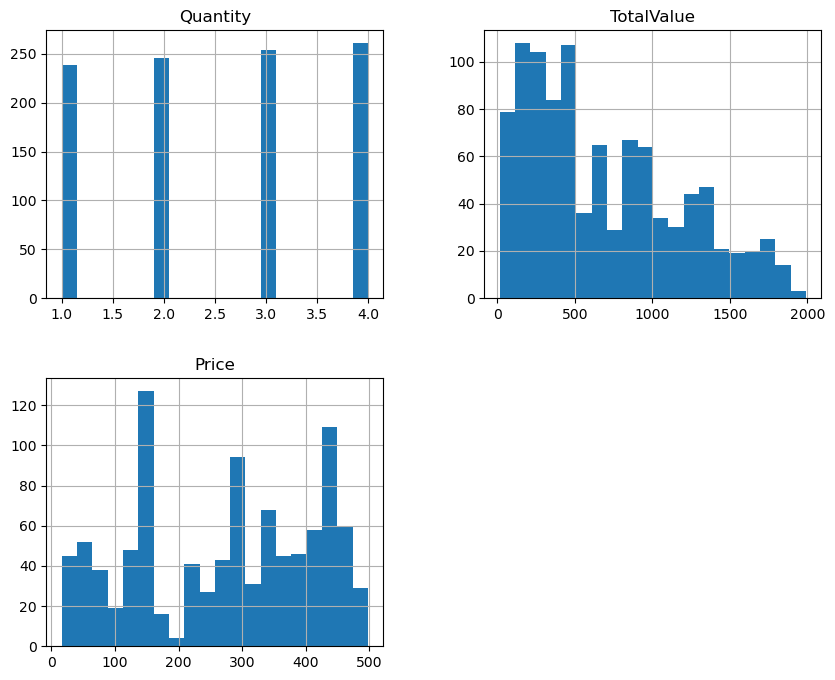

In [126]:
# Plot histograms for numerical features
df_renamed[['Quantity', 'TotalValue', 'Price' ]].hist(bins=20, figsize=(10, 8))
plt.show()

### Boxplots for Outliers

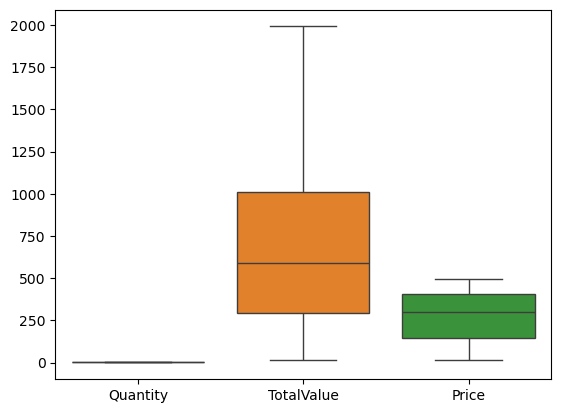

In [129]:
sns.boxplot(data=df_renamed[['Quantity', 'TotalValue', 'Price']])
plt.show()

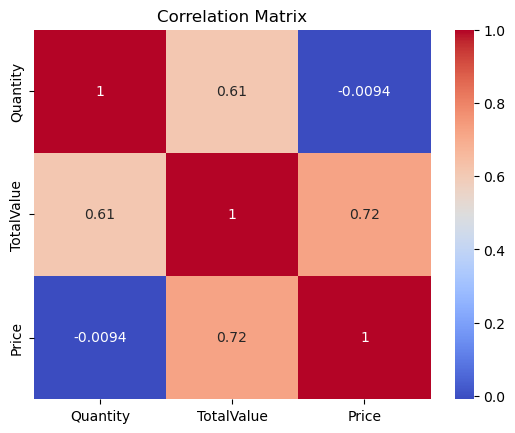

In [131]:
correlation = df_renamed[['Quantity', 'TotalValue', 'Price']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Analyze Categorical Features
## Value Counts for Each Categorical Featur:

In [135]:
print(df_renamed['ProductName'].value_counts())
print(df_renamed['Region'].value_counts())
print(df_renamed['Category'].value_counts())

ProductName
ActiveWear Smartwatch     40
SoundWave Headphones      38
BookWorld Biography       30
ActiveWear Rug            29
SoundWave Cookbook        29
                          ..
BookWorld Wall Art         7
BookWorld Rug              7
BookWorld Cookware Set     7
SoundWave Laptop           7
SoundWave Jacket           5
Name: count, Length: 66, dtype: int64
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


### Bar Plot for Region

C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\2601050022.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_renamed, x='Region', palette='viridis')


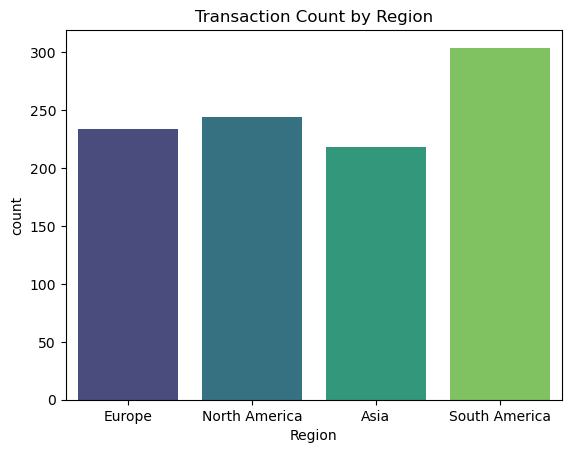

In [138]:
sns.countplot(data=df_renamed, x='Region', palette='viridis')
plt.title("Transaction Count by Region")
plt.show()


### Category Analysis:

C:\Users\DELL\AppData\Local\Temp\ipykernel_7236\1669343786.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_renamed, x='Category', palette='coolwarm')


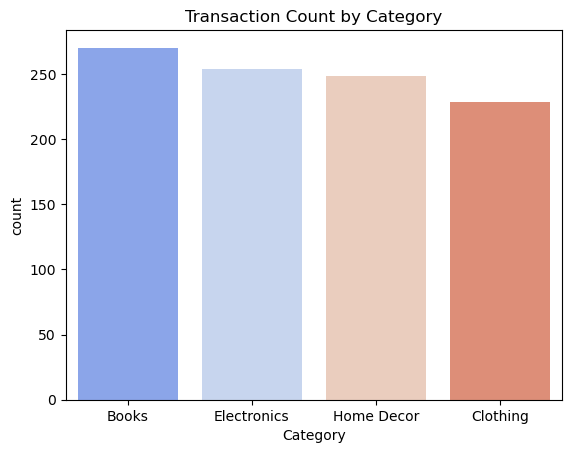

In [141]:
sns.countplot(data=df_renamed, x='Category', palette='coolwarm')
plt.title("Transaction Count by Category")
plt.show()

### Transactions by Part of Day

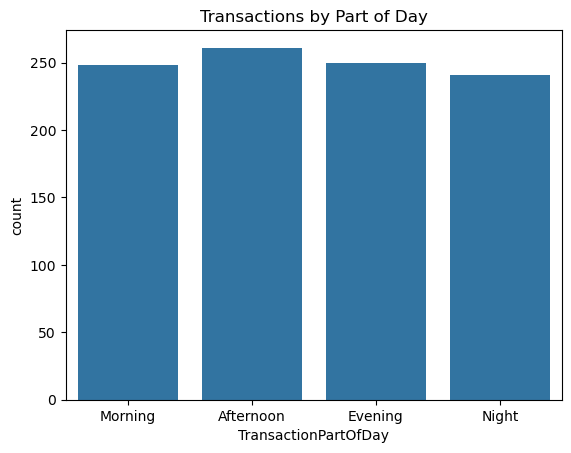

In [144]:
sns.countplot(data=df_renamed, x='TransactionPartOfDay', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Transactions by Part of Day")
plt.show()

# Time-Based Analysis` Transactions b Month`:

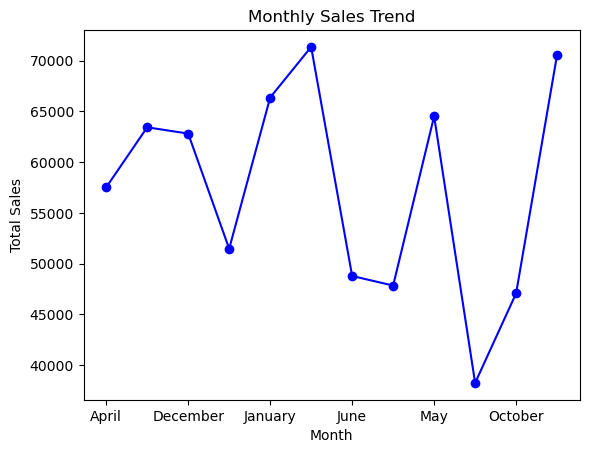

In [152]:
df_renamed.groupby('TransactionMonth')['TotalValue'].sum().plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


## Transactions by Weekday

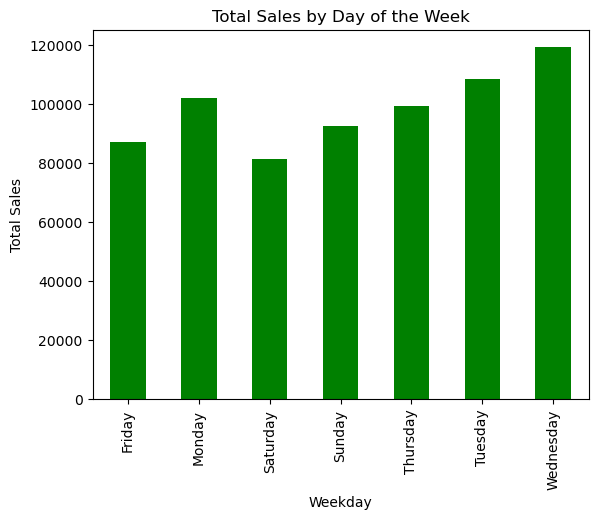

In [155]:
df_renamed.groupby('TransactionWeekday')['TotalValue'].sum().plot(kind='bar', color='green')
plt.title("Total Sales by Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.show()

## Hourly Transactions

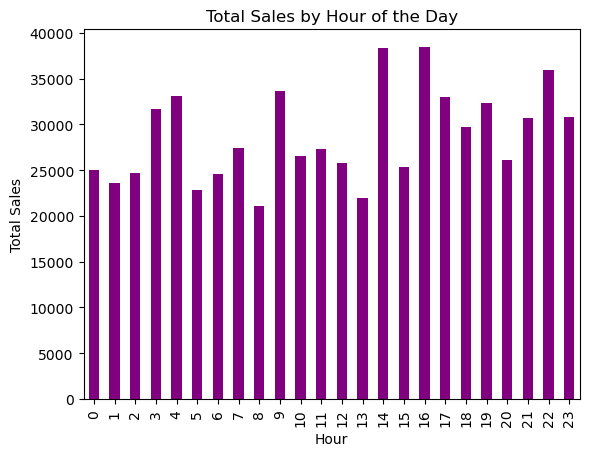

In [158]:
df_renamed.groupby('TransactionHour')['TotalValue'].sum().plot(kind='bar', color='purple')
plt.title("Total Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()

In [201]:
# Identifying top products by sales and Quantity
top_product = df_renamed.groupby("ProductName").agg(
    TotalQuantity=("Quantity", "sum"),
    TotalSales=("TotalValue", "sum")
).reset_index()

top_product['PercentageofTotalSales'] = round((top_product['TotalSales']/total_sales)*100,2)

In [203]:
most_performing_by_sales = top_product.sort_values(by="TotalSales", ascending=False)
most_performing_by_quantity = top_product.sort_values(by="TotalQuantity", ascending=False)

# Output the results
print("Most Performing Products by Sales:")
most_performing_by_sales

Most Performing Products by Sales:


,ProductName,TotalQuantity,TotalSales,PercentageofTotalSales
9,ActiveWear Smartwatch,100,39096.97,5.67
47,SoundWave Headphones,97,25211.64,3.65
52,SoundWave Novel,58,24507.90,3.55
4,ActiveWear Jacket,76,22712.56,3.29
6,ActiveWear Rug,79,22314.43,3.23
...,...,...,...,...
26,ComfortLiving Desk Lamp,26,1694.16,0.25
44,SoundWave Bluetooth Speaker,19,1223.22,0.18
30,ComfortLiving Rug,19,1063.81,0.15
10,ActiveWear T-Shirt,26,795.34,0.12


#  Region-Wise Analysis
### Region vs Total Sale:

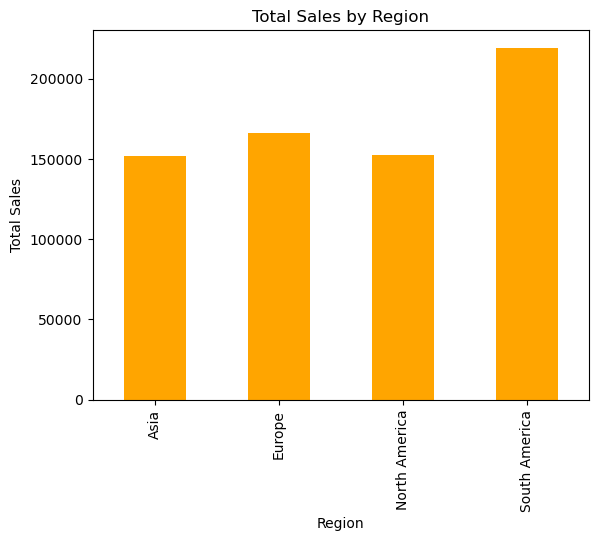

In [161]:
region_sales = df_renamed.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', color='orange')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

## Top Customers in Each Region

In [164]:
top_customers = df_renamed.groupby(['Region', 'CustomerName'])['TotalValue'].sum().sort_values(ascending=False)
print(top_customers)

Region         CustomerName  
Europe         Paul Parsons      10673.87
Asia           Bruce Rhodes       8040.39
North America  Gerald Hines       7663.70
               William Adams      7634.45
South America  Aimee Taylor       7572.91
                                   ...   
Europe         Deborah Wilcox      318.66
South America  Amber Gonzalez      223.96
Asia           Tina Ford           137.54
North America  Tyler Holt          132.64
Europe         James Murphy         82.36
Name: TotalValue, Length: 199, dtype: float64


#  Product Analysis
### Top-Selling Product:

In [167]:
top_products = df_renamed.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(top_products)

ProductName
ActiveWear Smartwatch       100
SoundWave Headphones         97
HomeSense Desk Lamp          81
ActiveWear Rug               79
SoundWave Cookbook           78
                           ... 
HomeSense Headphones         18
SoundWave Laptop             16
SoundWave Jacket             16
BookWorld Wall Art           15
ComfortLiving Headphones     15
Name: Quantity, Length: 66, dtype: int32


### Sales by Product Category

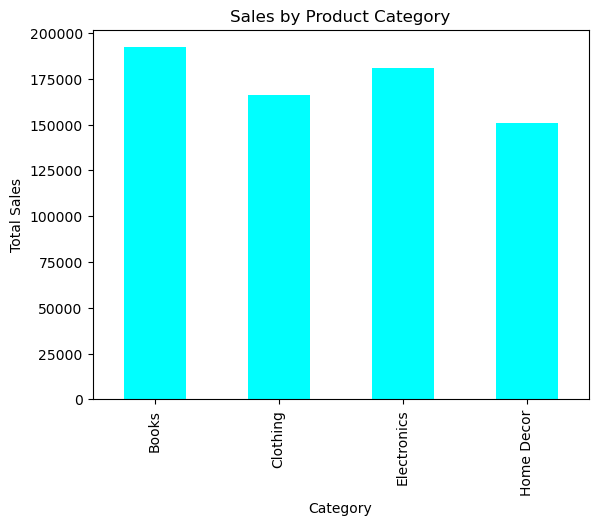

In [170]:
category_sales = df_renamed.groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='bar', color='cyan')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

In [234]:
df_renamed.groupby(['Category'])['TotalValue'].sum().reset_index().sort_values(by='TotalValue',ascending= False)

,Category,TotalValue
0,Books,192147.47
2,Electronics,180783.50
1,Clothing,166170.66
3,Home Decor,150893.93


# Insights from Feature Engineering:

### Transactions by Part of Day

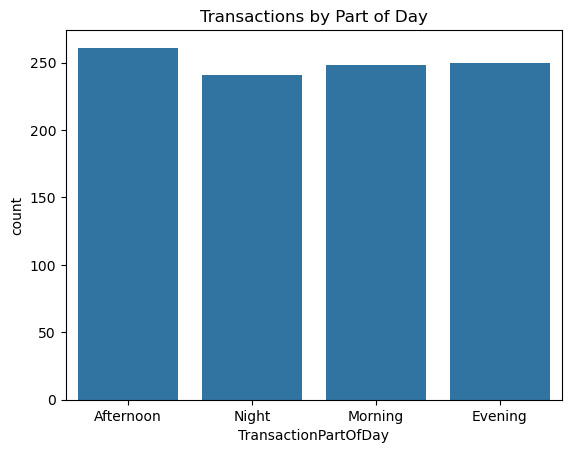

In [175]:
sns.countplot(data=df_renamed, x='TransactionPartOfDay')
plt.title("Transactions by Part of Day")
plt.show()

### Signup Trends

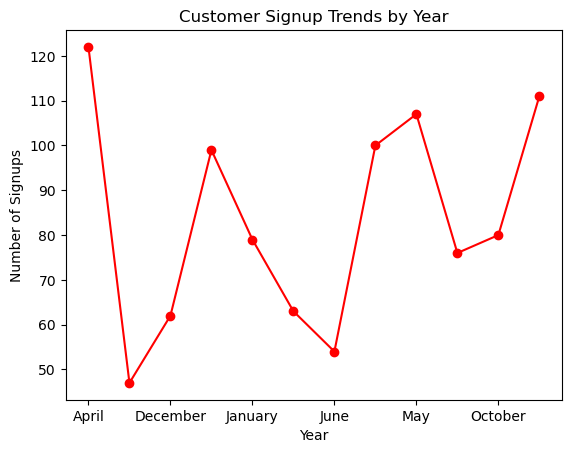

In [178]:
signup_trends = df_renamed.groupby('SignupMonth')['CustomerID'].count()
signup_trends.plot(kind='line', marker='o', color='red')
plt.title("Customer Signup Trends by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

#   Question 1: Total Sales by Region

### Group the data by Region and sum up the TotalValue to see sales contributions from each region.

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


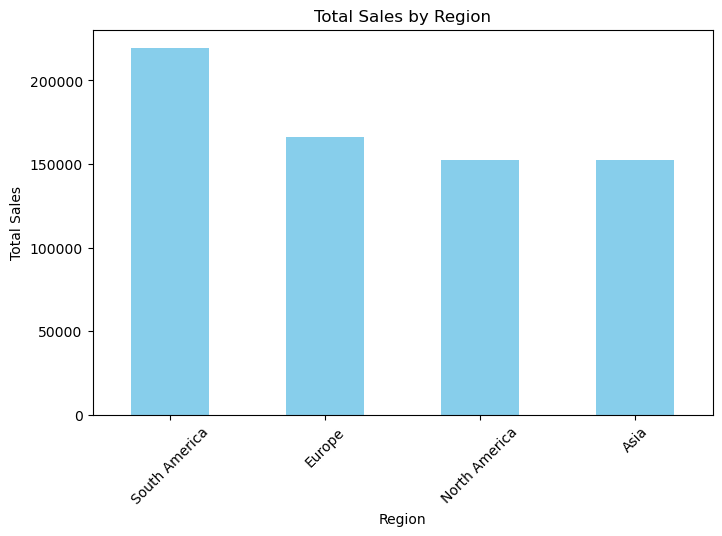

In [181]:
region_sales = df_renamed.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

# Visualize the region-wise sales
region_sales.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [239]:
df_renamed.groupby(['Region'])['TotalValue'].sum().reset_index()

,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56


# question 2: Top Contributing Customers
### Group the data by CustomerName and sum up the TotalValue to identify the highest contributing customers.

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


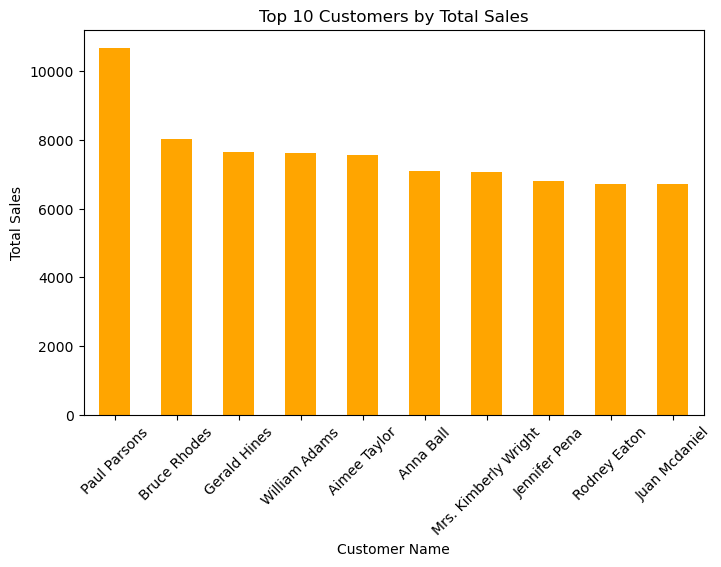

In [184]:
customer_sales = df_renamed.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False)
print(customer_sales.head(10))  # Display top 10 customers

# Visualize the top 10 customers
customer_sales.head(10).plot(kind='bar', color='orange', figsize=(8, 5))
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# question 3:  Top Customers by Region
### Group the data by both Region and CustomerName to find top customers in each region.

               CustomerName  TotalValue
Region                                 
Asia           Bruce Rhodes     8040.39
Europe         Paul Parsons    10673.87
North America  Gerald Hines     7663.70
South America  Aimee Taylor     7572.91


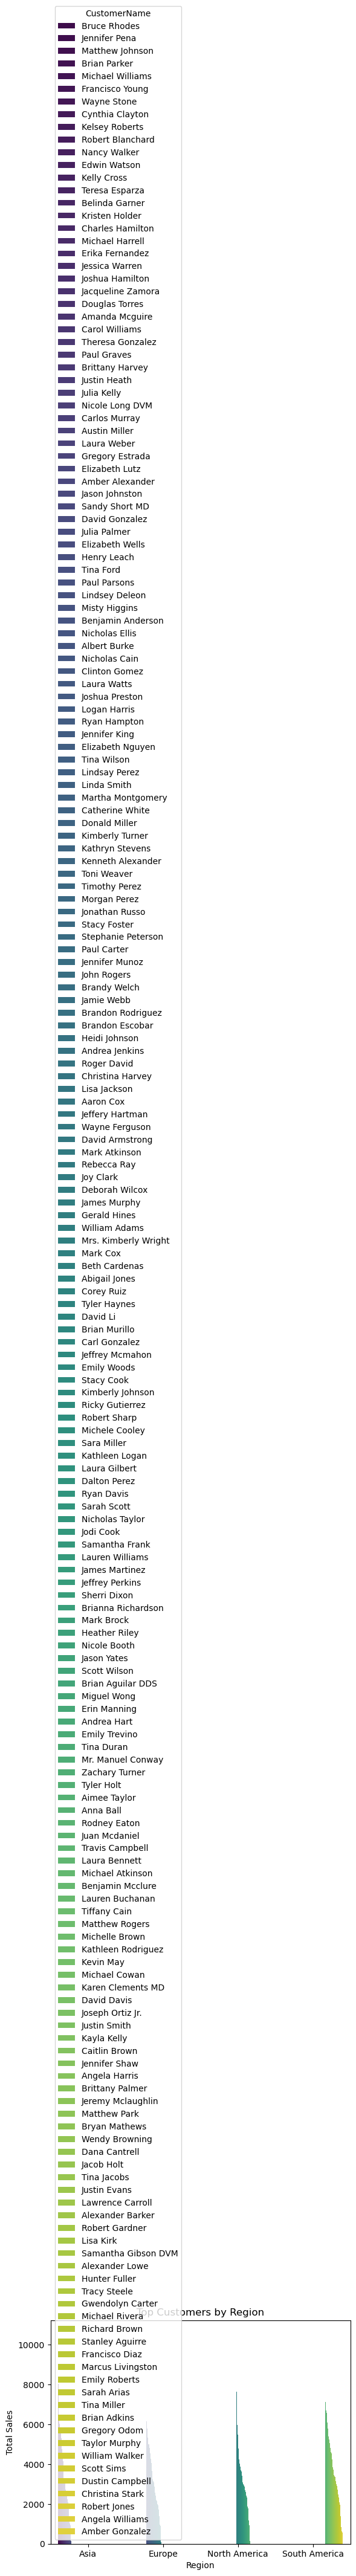

In [187]:
top_customers_region = (
    df_renamed.groupby(['Region', 'CustomerName'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(['Region', 'TotalValue'], ascending=[True, False])
)

# Display the top customer in each region
top_customer_by_region = top_customers_region.groupby('Region').first()
print(top_customer_by_region)

# Optionally, visualize it
sns.barplot(
    data=top_customers_region,
    x='Region',
    y='TotalValue',
    hue='CustomerName',
    palette='viridis',
    estimator=sum,
)
plt.title("Top Customers by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


# question 4: Sales Contribution Percentage
### To see which region and customers contribute the most as a percentage of the total sales:

### Region Contribution:

Region
South America    31.790431
Europe           24.095029
North America    22.074548
Asia             22.039993
Name: TotalValue, dtype: float64


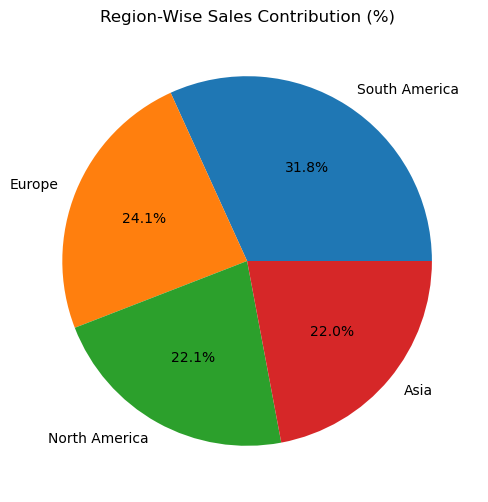

In [190]:
total_sales = df_renamed['TotalValue'].sum()
region_sales_percentage = (region_sales / total_sales) * 100
print(region_sales_percentage)

# Pie chart visualization
region_sales_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title("Region-Wise Sales Contribution (%)")
plt.ylabel("")
plt.show()


## South America leads in Books {31.790431%}

### Customer Contribution:

CustomerName
Paul Parsons            1.546948
Bruce Rhodes            1.165281
Gerald Hines            1.110688
William Adams           1.106449
Aimee Taylor            1.097530
Anna Ball               1.030633
Mrs. Kimberly Wright    1.025120
Jennifer Pena           0.988350
Rodney Eaton            0.973299
Juan Mcdaniel           0.972195
Name: TotalValue, dtype: float64


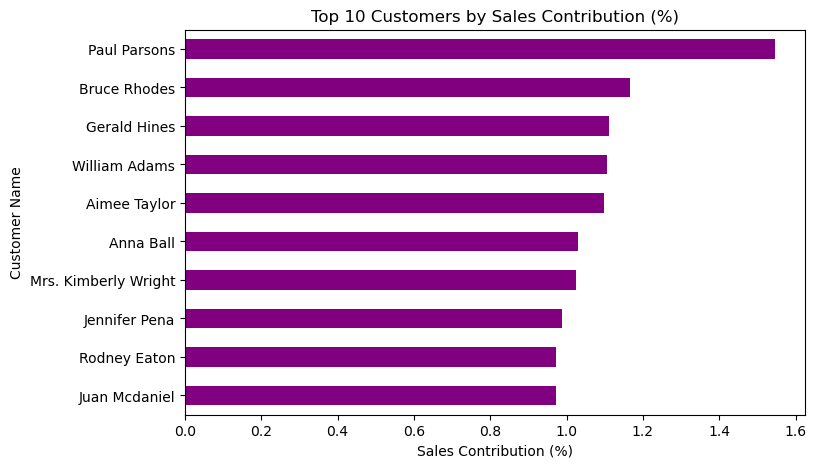

In [193]:
customer_sales_percentage = (customer_sales / total_sales) * 100
print(customer_sales_percentage.head(10))  # Top 10 customers

# Bar chart visualization for top customers
customer_sales_percentage.head(10).plot(kind='barh', color='purple', figsize=(8, 5))
plt.title("Top 10 Customers by Sales Contribution (%)")
plt.xlabel("Sales Contribution (%)")
plt.ylabel("Customer Name")
plt.gca().invert_yaxis()  # Flip y-axis for better readability
plt.show()

In [209]:
df_renamed.head(1)

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,CustomerName,Region,YearMonth,ProductName,Category,TransactionYear,TransactionMonth,TransactionDay,TransactionWeekday,TransactionHour,TransactionPartOfDay,SignupYear,SignupMonth,SignupDaysName
0,T00758,C0017,P001,3,507.9,169.3,Jennifer King,Europe,2023-12,ActiveWear Biography,Books,2024,May,28,Tuesday,14,Afternoon,2023,December,Tuesday


In [211]:
 customer_orders_value =df_renamed.groupby('CustomerID').agg(
    TotalOrders=('TransactionID', 'count'),  
    TotalValue=('TotalValue', 'sum') 
).reset_index()

customer_orders_value.sort_values(by = "TotalValue",ascending=False).head(10)

,CustomerID,TotalOrders,TotalValue
140,C0141,10,10673.87
53,C0054,8,8040.39
64,C0065,10,7663.70
155,C0156,11,7634.45
81,C0082,7,7572.91
186,C0188,8,7111.32
58,C0059,8,7073.28
27,C0028,8,6819.57
98,C0099,8,6715.72
164,C0165,9,6708.10


#### Business insights identified:


`Total Sales this Year:`
$2047.46 across all regions and categories.

`Total Orders Placed:`
1000 orders across all regions and categories.

`Average Order Value (AOV):`
$272.55 per order.

`Average Number of Orders Placed per Customer:`
5.03 orders per customer on average.

#### Regional Insights:

`South America has the highest total value at` 219352.56

`Europe` 166254.63
` North America a` 152313.40

 `Asia` 152074.97

#### Category Insights:

Books have the highest total across all regions, with a combined value of `192147.47`.

Electronics`180783.50`

Clothing `166170.66`

Home Decor `150893.93`

#### Regional Category Breakdown:

South America leads in Books `69,752.03`.Electronics`58,84632` reflecting a strong preference for these categories.

####  Focus on 
Promotions for Underperforming Categories:

For Home Decor and Clothing, create seasonal promotions and bundle offers. Consider launching limited-edition collections or collaborating with well-known designers to generate buzz.

Leverage social media platforms  to showcase home decor inspiration or fashion styling that appeals to target demographic.

South America shows potential as a strong growth region, particularly for Books and Electronics, given their significant contributions. 
Books, while maintaining consistent sales in North America, South America, and Europe, struggle to capture significant market share in Asia. Electronics is the most consistent category across all regions, showing steady sales performance. Home Decor and Clothing require targeted marketing campaigns and promotions to improve their sales.
a.